In [80]:
import numpy as np 
import pandas as pd

In [81]:
data=pd.read_csv('/content/drive/MyDrive/nlp/datasets/IMDB_Dataset.csv')

In [82]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [83]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [84]:
data.isna().sum()

review       0
sentiment    0
dtype: int64

In [85]:
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [86]:

import re

In [87]:
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

In [88]:
data["review"] =data["review"].apply(lambda x:remove_between_square_brackets(x))

In [89]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data['review']= data['review'].apply(lambda x: cleaning_punctuations(x))
data['review'].tail()

49995    I thought this movie did a down right good job...
49996    Bad plot bad dialogue bad acting idiotic direc...
49997    I am a Catholic taught in parochial elementary...
49998    Im going to have to disagree with the previous...
49999    No one expects the Star Trek movies to be high...
Name: review, dtype: object

In [90]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data['review'] = data['review'].apply(lambda x: cleaning_numbers(x))
data['review'].tail()

49995    I thought this movie did a down right good job...
49996    Bad plot bad dialogue bad acting idiotic direc...
49997    I am a Catholic taught in parochial elementary...
49998    Im going to have to disagree with the previous...
49999    No one expects the Star Trek movies to be high...
Name: review, dtype: object

In [91]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
data['review']=data['review'].apply(remove_special_characters)

In [92]:
from sklearn.preprocessing import LabelBinarizer

In [93]:
lb=LabelBinarizer()
data['sentiment']=lb.fit_transform(data['sentiment'])

In [94]:
data_texts=data['review']
data_labels=data['sentiment']


In [95]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [96]:
 
vectorizer = CountVectorizer(max_features=10,lowercase=False)
tf_idf_transformer = TfidfTransformer()

In [98]:

tf_idf = tf_idf_transformer.fit_transform(vectorizer.fit_transform(data_texts))
x_train_weight = tf_idf.toarray()

In [104]:
from sklearn.model_selection import train_test_split

# Split Train and test data
train_sentiment, test_sentiment, train_review, test_review = train_test_split(x_train_weight, data_labels, test_size=0.2, random_state=0)

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
lr=LogisticRegression()

In [107]:
model=lr.fit(train_sentiment,train_review)

In [108]:
model.score(train_sentiment,train_review)

0.60265

In [109]:
model.score(test_sentiment,test_review)

0.6013

In [111]:
pred=model.predict(test_sentiment)
pred

array([1, 1, 1, ..., 1, 0, 0])

In [116]:
feature_to_coef = {
    word: coef for word, coef in zip(
        tf_vec.get_feature_names(), model.coef_[0]
    )
}
for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print (best_positive)

('aaron', 1.4414572718754055)
('abc', 0.6300033673606541)
('abilities', 0.32613127432834405)
('ability to', 0.18252243206735863)
('ability', -0.08804529742469544)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [117]:
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:5]:
    print (best_negative)

('abound', -2.227676246335285)
('about', -1.4347345253978132)
('able to', -0.7368316754692836)
('abandoned', -0.7010823684737109)
('able', -0.6941847677229874)


In [118]:
pos_words=''
for best_positive in sorted(feature_to_coef.items(), key=lambda x: x[1], reverse=True)[:100]:
    pos_words=pos_words+ str(best_positive)
    

In [119]:
neg_words=''
for best_negative in sorted(feature_to_coef.items(), key=lambda x: x[1])[:100]:
    neg_words=neg_words+ str(best_negative)

In [120]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

In [122]:

import matplotlib.pyplot as plt


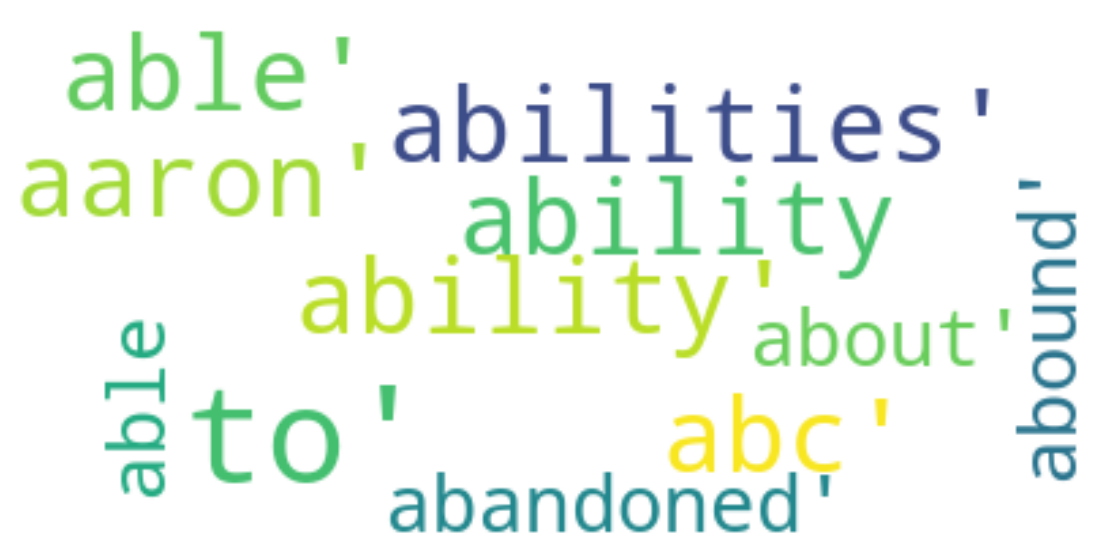

In [123]:

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(pos_words)


plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()